# Online Shopping Intention Analysis

In [3]:
# Imorting necessary libraries and data
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py 
import plotly.graph_objs as go 

C:\Users\farsim\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
# Reading the data 
data = pd.read_csv('online_shoppers_intention.csv')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## We can see that most of the columns are properly scaled. Lets check for the null values

In [5]:
missing = data.isnull().sum()
missing

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

*Whats with 14?* Lets fill these anyway. 

In [6]:
data.fillna(0, inplace= True)

In the dataset, we have column 5 and 6 those tells us about product reated information and customer bounce rates. Lets check those columns. These will be X for now

In [7]:
x = data.iloc[:,[5,6]].values
x.shape

(12330, 2)

### Cluestering groups of customers 

In [8]:
from sklearn.cluster import KMeans
wcss = []

for i in range (1,11): #10 groups ?
    km = KMeans(
        n_clusters= i,
        init='k-means++',
        max_iter= 300,
        n_init= 10,
        random_state= 0,
        algorithm= 'full',
        tol = 0.001
    )
    km.fit(x)
    lables = km.labels_
    wcss.append(km.inertia_)




C:\Users\farsim\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\farsim\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\farsim\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [9]:
wcss 

[45152288642.74861,
 20936274656.14657,
 12621705299.091873,
 8245486039.162769,
 5465609784.862863,
 3848743354.943726,
 2788909557.380541,
 2047247343.2720075,
 1587111175.8036656,
 1287076115.8478665]

## Plotting Time 

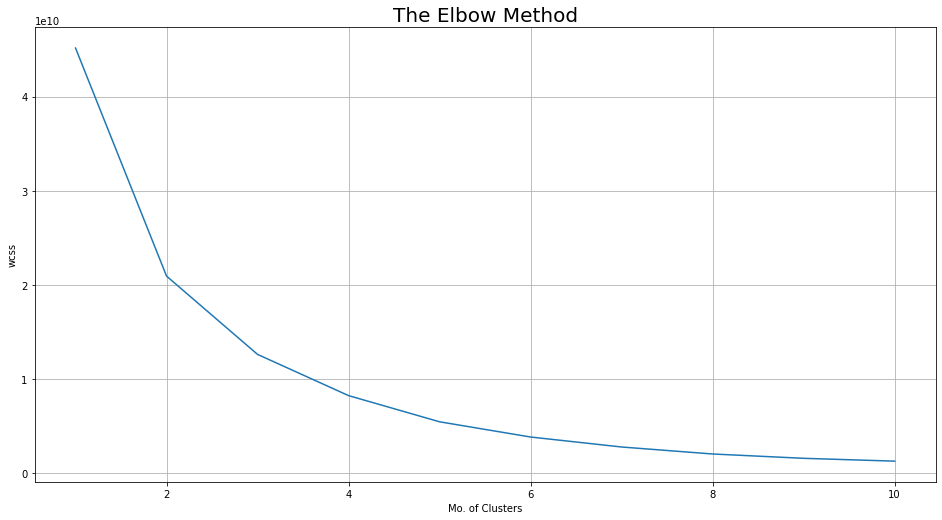

In [10]:
plt.rcParams['figure.figsize'] = (13,7)
plt.plot(range(1,11),wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('Mo. of Clusters')
plt.ylabel('wcss')
plt.show()

The graph says the maximum curvature is at the second index, that is the number of optimal clustering groups for the duration of the product and the bounce rates is 2. Once the number of clusterings is determined, we apply the K Means method and plot the clusters. In the previous km model, it was i range(1,11), Now it will be 2 since our plot tells us that that will be the wosest number.

In [11]:
km = KMeans(
    n_clusters=2,
    init='k-means++',
    max_iter= 300,
    n_init = 10, 
    random_state = 0

)

#predict
y_means = km.fit_predict(x) #fit_predict is used for unsupervised learning where we dont have labelled data



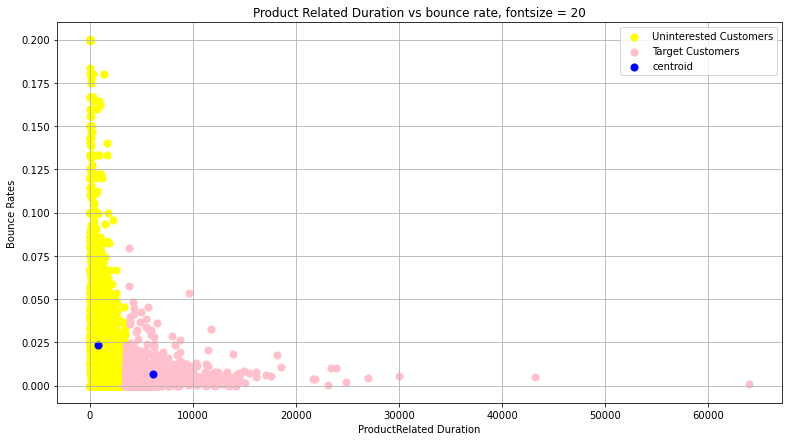

In [12]:
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'yellow', label = 'Uninterested Customers')
plt.scatter(x[y_means==1,0],x[y_means==1,1], s = 50, c = 'pink', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s =50, c = 'blue', label = 'centroid') #for plotting the controids according to the km model
plt.title('Product Related Duration vs bounce rate, fontsize = 20')
plt.grid()
plt.xlabel('ProductRelated Duration')
plt.ylabel('Bounce Rates')
plt.legend()



plt.show()

The above plot shows us the bounce rate on y axis (gone customers) and the duration of a custmer stayed on the product site(x axis) . Clearly, we are not interested in those customers who stayed less and whose bounce rate is high. 

Looking at this K Means grouping plot, we can say with certainty that customers who spent more time on a product-related website are very less likely to leave the website after viewing a single page.

Now we will check how our medel actually have been able to predict reality.

## Confusion Matrix

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels_true = le.fit_transform(data['Revenue']) # represents the returning/potential customers

labels_pred = y_means # labels that our model predicted

# Now we will print adjusted random index, which is a evaluation of the clustering we have by our model

from sklearn import metrics 
score = metrics.adjusted_rand_score(labels_true, labels_pred)

score




0.08344649929017146

In [14]:
# We can also print our confusion matrix , which is an evaluation of our model as well 

cm = metrics.confusion_matrix(labels_true,labels_pred)

cm  

array([[9769,  653],
       [1624,  284]], dtype=int64)

# Observation 
0 | 9269 , 653 |                                             
1 | 1624 , 284 |  
____________________                                                                                        0      1

We can see that our model predicted 9269 customers as non potential which they really are and only 284 customers as potential customers which they really are. From this observation, the model did a moderately fair job detecting the true potentials. 